# Isolation Forest

![basic isolation](img/basic-isolation-example.png)

FICOU MUITO GRANDE, DEPOIS EU EDITO

## 1. Introdução

Isolation Forest é um algoritmo eficiente de deteção de dados extremos, especialmente em datasets com alta dimensionalidade.
O algoritmo constroi uma random forest em cada árvore de decisão cresce aleatoriamente. Em cada nó ele seleciona uma feature aleatoriamente, depois seleciona um threshold aleatório para dividir o dataset em dois. O algoritmo divide o dataset gradualmente até que todas as instâncias estejam isoladas das outras instâncias. Outliers normalmente estão longe de outras instâncias, logo esses datapoints tendem a ser isolados em menos etapas que datapoints "normais". 

## 2. Dataset

A GENTE PODE USAR UM DATASET QUALQUER OU CRIAR UM E GERAR ALGUNS OUTLIERS MATEMATICAMENTE NELES (A GENTE PODE USAR ISSO PRA MOSTRAR UM EXEMPLO SIMPLIFICADO E DEPOIS ABORDAR UM DATASET GRANDE). VOU DEIXAR O ARTIFICIAL AQUI EMBAIXO.

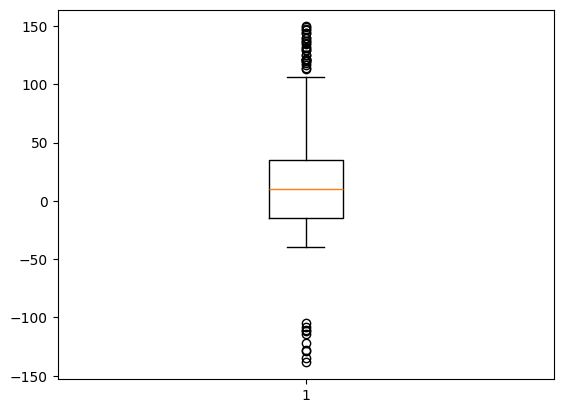

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

uniformSkewed = np.random.rand(10000) * 100 - 40
high_outliers = np.random.rand(38) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100

data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data)
plt.show()

In [ ]:
DEPOIS DISSO É TREINAR UM MODELO COM O SCIKIT-LEARN E MANDAR ELE RESOLVER ISSO AÍ